# Recurrent Neural Network Video MNIST Lab

By the end of this lab you will have

- Defined and trained a recurrent neural network with keras to perform video frame prediction with `batch_size=1`
- Defined and trained a recurrent neural network with keras to perform video frame prediction with `batch_size=100`
- Evaluated hyperparameters with a validation set
- Defined and trained a recurrent neural network with keras to perform **accurate** video frame prediction

Let's get started!

The mnist video dataset is courtesty of github user [despoisj](https://github.com/despoisj) and his/her [LatentSpaceVisualization]( https://github.com/despoisj/LatentSpaceVisualization) project.

---

# Load Data

The following code loads in the mnist video dataset and displays the first ten samples.

4


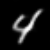

4


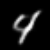

4


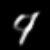

7


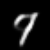

7


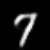

7


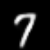

7


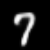

7


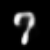

7


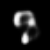

5


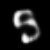

In [1]:
from IPython.display import display
import pickle

[imgs, y] = pickle.load(open('LatentSpaceVisualization/Visuals/mnist_transitions.p', 'rb'))
for img, y_ in zip(imgs[:10], y[:10]):
    print(y_)
    display(img)

# Flatten Images

The following code resizes each image to `(28, 28)` and normalizes the pixel intensities and converts `y` to a categorical representation.

In [2]:
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.utils.np_utils import to_categorical

imgs = [img.resize(size=[28, 28]) for img in imgs]
X = np.array([img_to_array(img).flatten() for img in imgs]) / 255.
Y = to_categorical(y)

X.shape, Y.shape

Using TensorFlow backend.


((6000, 784), (6000, 10))

# keras RNNs with `batch_size=1`

## Question

- What shape do you need to convert `X` to to make it compatible a with `SimpleRNN(..., batch_input_shape=[1, 6000, 784])` layer?

## Hints

- This is the most quick-and-dirty way to make `X` and `Y` compatible with a keras recurrent layer

## Question

- How about `Y`?

## Hint

- The shape for the transformed `Y` is identical to the shape for the transformed `X` but for one dimension

## Task

- Reshape `X` and `Y` and save them into new variables call `X1` and `Y1` respectively which satisfy the above requirement

## Task

- Define a keras RNN model compatible with `X1` and `Y1`

## Requirement

- You must specify

```python
SimpleRNN(..., return_sequences=True, batch_input_shape=[1, 6000, 784])
```

as the first layer in your architecture.

## Task

- Fit your RNN model on `X1` and `Y1`

## Requirement

- Fit your model with `model.fit(..., batch_size=1, shuffle=False, epochs=50)`

## Question

- List two downsides of using `model.fit(..., batch_size=1)` as opposed to `model.fit(..., batch_size=m)` where $m > 1$.

# keras RNNs with `batch_size=100`

## Question

- What shape do you need to convert `X` to to make it compatible a with `SimpleRNN(..., batch_input_shape=[100, 6000, 784])` layer?

## Constraint

- One batch must complete an entire epoch

## Hints

- A batch size of `100` means we effectively have `100` copies of our RNN each of which are being simulaneously unrolled on their respective portions of the original input sequence
- The answer will be of shape `(batch_size, timesteps, 784)`

## Task

- Reshape `X` and `Y` and save them into new variables call `X100` and `Y100` respectively which satisfy the above requirement

## Requirements

- There must be no overlap between batches (i.e. each image can only appear in a single batch

## Hint

- The simplest way to achieve this is to split `X` into `100` different chunks with `numpy.split()`

## Task

- Define a RNN model compatible with `X100` and `Y100`

## Requirement

- You must specify

```python
SimpleRNN(..., return_sequences=True, batch_input_shape=[100, 60, 784])
```

as the first layer in your architecture.

## Task

- Fit Your RNN Model on `X100` and `Y100`

## Requirement

- Run your model for `model.fit(..., batch_size=100, epochs=50)`

## Question

- Describe the differences you see when optimizing on `(X100, Y100)` as opposed to `(X1, Y1)`.

## Task

- Split up `X100` and `Y100` into variables `(X_train50, Y_train50)` and `(X_val50, Y_val50)` and re-fit your model with this validation data

## Hints

- `X_train50` and `Y_train50` have shape `(50, 60, 784)` and `(50, 60, 10)` respectively. Their validation counterparts follow similarly.

## Task

- Modify your keras model to make it compatible with `(X_train50, Y_train50)` and `(X_val50, Y_val50)`

## Hint

- Re-instantiate your model with `SimpleRNN(..., batch_input_shape=[50, 60, 784])`

## Question

- Why did we choose `50` for our new batch size?

## Task

- Refit your model with `(X_train50, Y_train50)` and `(X_val50, Y_val50)`

## Hint

- Make sure to call `model.fit(..., batch_size=50)`

## Task

- Design and optimize a recurrent neural network to maximize validation accuracy on `(X_val50, Y_val50)`

## Hints

- Stack multiple recurrent layers
- Use a convolutional layer between the recurrent layers and the image

## Requirement

- The only recurrent layer you can use is SimpleRNN

# Bonus Activities

- Use more than one batch per epoch with keras stateful RNNs
- Use overlapping windows instead of disjoint windows in each batch
- Monitor gradients during training with tensorboard